<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [104]:
!pip install ydata_profiling

In [105]:
!pip install phik -q

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re
import phik
import pickle

random.seed(42)
np.random.seed(42)

In [107]:
import warnings
warnings.filterwarnings('ignore')

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Сиды фиксируем для воспроизводимости результатов`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [108]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

**Ваш ответ здесь.**

In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [110]:
missing_values_info = df_train.isnull().sum()
corrupted_columns = missing_values_info[missing_values_info > 0]
print(corrupted_columns)
print(sum(corrupted_columns))

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
1005


In [111]:
missing_data_rows = df_train.isnull().any(axis=1).sum()
print(missing_data_rows)

203


In [112]:
num_duplicates = df_train.duplicated().sum()
print(num_duplicates)

985


In [113]:
profile = ProfileReport(df_train, title='Pandas Profiling Report')

In [114]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 19.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Выводы**:
- Датасет содержит 1005 ячеек с отсутствующими данными в колонках: `mileage`, `engine`, `max_power`, `torque`, `seats`, - что затрагивает небольшой (2.9%) процент от всех строк;
- Датасет содержит 985 дублирующихся строк (~14%), что не является критичным.

P.S. `ProfileReport` и `df_train.duplicated().sum()` считают разные значения для дублирующихся строк, потому что в первом случае счиаються уникальные строки, имеющие дубликаты, а во втором - все строки, для которых в датасете уже была найдена идентичная строка.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [x] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [115]:
df_train.describe(exclude=['object'])

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [116]:
df_test.describe(exclude=['object'])

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [117]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [118]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

**Выводы**:
- В колонках `selling_price` и `km_driven` для тренировочной и тестовой выборки среднее значение больше медианы, что говорит смещенном вправо распределении;
- Для тренировочной и тестовой выборки колонки `selling_price` и `km_driven` имеют высокое среднеквадратчное отклонение, что может говорить о выбросах;
- Машины с ручной коробкой передач (transmission: manual) и физическим лицом в качестве продавца (seller_type: Indivbidual) составляют более 80% выборки;
- Тренировочная и тестовая выборки имеют сравнительно похожие значения для среднего и медианы числовых столбцов, что говорит о репрезентативности тренировочной выборки.

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [x] Отобразите такие объекты (0.01 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [x] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [119]:
# Использовал Gemini

df_train_no_target = df_train.drop(columns=['selling_price'])
duplicates_no_target = df_train_no_target.duplicated().sum()
print(f"Duplicate rows: {duplicates_no_target}")

duplicate_indices = df_train_no_target[df_train_no_target.duplicated(keep=False)].index
print(df_train.loc[duplicate_indices].sort_values(by=list(df_train_no_target.columns)))

Duplicate rows: 1159
                                      name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission     

In [120]:
df_train = df_train.drop_duplicates(subset=df_train_no_target.columns, keep='first')

In [121]:
assert df_train.shape == (5840, 13)

In [122]:
df_train = df_train.reset_index(drop=True)

**Выводы**:
- Было удалено 1159 строк (16.6% данных).
Возможные скрытые дубликаты:
- Разные названия для одного и того же автомобиля (включая опечатки и регистр), например, Volvo XC40 D4 Inscription BSIV и Volvo XC40 D4 BSIV;
- Незначительные различия в числовых признаках: 18.6 kmpl и 18.601 kmpl.

Чтобы отлавливать дубликаты можно ввести интервал на котором мы считаем числовой признак одинаковым. Для названий - можно приводить их к одному регистру, парсить по словам и смотреть, что отличается. Также можно применить LLM.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [123]:
def convert_column(df, column_name, unit):
    df[column_name] = df[column_name].astype(str).str.replace(unit, '')
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='float')
    return df

In [124]:
df_train = convert_column(df_train, 'mileage', ' kmpl')
df_test = convert_column(df_test, 'mileage', ' kmpl')

df_train = convert_column(df_train, 'engine', ' CC')
df_test = convert_column(df_test, 'engine', ' CC')

df_train = convert_column(df_train, 'max_power', ' bhp')
df_test = convert_column(df_test, 'max_power', ' bhp')

In [125]:
# Использовал Deepseek

def parse_torque_string(torque_str):
    if not torque_str or pd.isna(torque_str):
        return None, None

    clean_str = torque_str.lower().replace(',', '').replace('(', ' ').replace(')', ' ')
    clean_str = re.sub(r'\s+', ' ', clean_str.strip())

    patterns = [
        r'(\d+\.?\d*)\s*(nm|kgm).*?(\d+)(?:\s*-\s*(\d+))?\s*rpm',
        r'(\d+\.?\d*)\s*@\s*(\d+).*?(nm|kgm)',
        r'(\d+\.?\d*)\s*@\s*(\d+)(?:\s*-\s*(\d+))?',
        r'^(\d+\.?\d*)\s*(nm|kgm)$',
        r'(\d+\.?\d*)[^\d]+(\d+)(?:[^\d]+(\d+))?'
    ]

    for pattern in patterns:
        match = re.search(pattern, clean_str)
        if match:
            groups = match.groups()

            if pattern == patterns[0]:
                torque_value = float(groups[0])
                unit = groups[1]
                rpm_low = int(groups[2])
                rpm_high = int(groups[3]) if groups[3] else rpm_low

            elif pattern == patterns[1]:
                torque_value = float(groups[0])
                rpm_low = int(groups[1])
                rpm_high = rpm_low
                unit = groups[2]

            elif pattern == patterns[2]:
                torque_value = float(groups[0])
                rpm_low = int(groups[1])
                rpm_high = int(groups[2]) if groups[2] else rpm_low
                unit = 'nm'

            elif pattern == patterns[3]:
                torque_value = float(groups[0])
                unit = groups[1]
                rpm_low = rpm_high = None

            else:
                torque_value = float(groups[0])
                rpm_low = int(groups[1]) if groups[1] else None
                rpm_high = int(groups[2]) if groups[2] else rpm_low
                unit = 'nm'

            if unit == 'kgm':
                torque_value = torque_value * 9.80665

            return round(torque_value, 2), rpm_high

    return None, None

In [126]:
def convert_torque(df):
    for index, row in df.iterrows():
        torque_str = row['torque']
        torque_value, rpm_high = parse_torque_string(torque_str)
        df.at[index, 'torque'] = torque_value
        df.at[index, 'max_torque_rpm'] = rpm_high
    return df

In [127]:
df_train = convert_torque(df_train)
df_test = convert_torque(df_test)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [128]:
columns_to_impute = ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

for col in columns_to_impute:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)

In [129]:
df_train.info() # 100% пропусков заполнено

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float32
 9   engine          5840 non-null   float32
 10  max_power       5840 non-null   float32
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float32(3), float64(3), int64(3), object(5)
memory usage: 570.4+ KB


**Выводы**:
- В условиях смещенных данных оптимальнее применять медиану, потому что на нее, в отличие от среднего значения, не влияют выбросы;
- Правильнее считать медиану только на тренировочной выборке, а затем применять ее для заполнения пробелов в тренировочном и тестовом датасете. В противном случае предобработка тестовой выборки (расчет медианы) повлияет на чистоту эксперимента при тестировании модели.


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [130]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float32
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float32
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float32(2), float64(2), int64(5), object(5)
memory usage: 593.3+ KB


`Seats можно конвертировать в категориальный признак, потому что большинство машин имеют фиксированные конфгурации количества сидений. В основном 2-х или 5-ти местные.`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков сдвинуло наши распределения? Могло ли это вообще возникнуть?

In [132]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.394732  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.919004   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.299999  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000      5840.00000  
mean     87.906364   175.357517     5.426712      3006.35411  
std      31.640430   107.145014     0.982344       934.35373  
min       0.000000    47.070000     2.000000       500.00000  
25%      68.000000   111.800000     5.000000      2200.00000  
50%      81.860001   160.000000     5.000000      2800.00000  
75%      99.000000   200.060000     5.000000      4000.00000  
max     400.000000  1863.260000    14.000000     21800.00000

In [133]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.324192  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.911901   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.587500  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.299999  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.299999  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    28.400000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841675   177.518640     5.403000     3052.196000  
std      34.893379   103.845873     0.912921      911.114242  
min      34.200001    11.200000     4.000000      500.000000  
25%      69.000000   111.700000     5.000000     2500.000000  
50%      82.424999   160.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1421.960000     9.000000     5200.000000

`Так как мы использовали медиану для заполнения пропусков, то среднее значение могло лишь только приблизиться к медианному, но точно не отдалиться. Поэтому заполнение пропусков не могло вызвать сдвиг распределения.`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

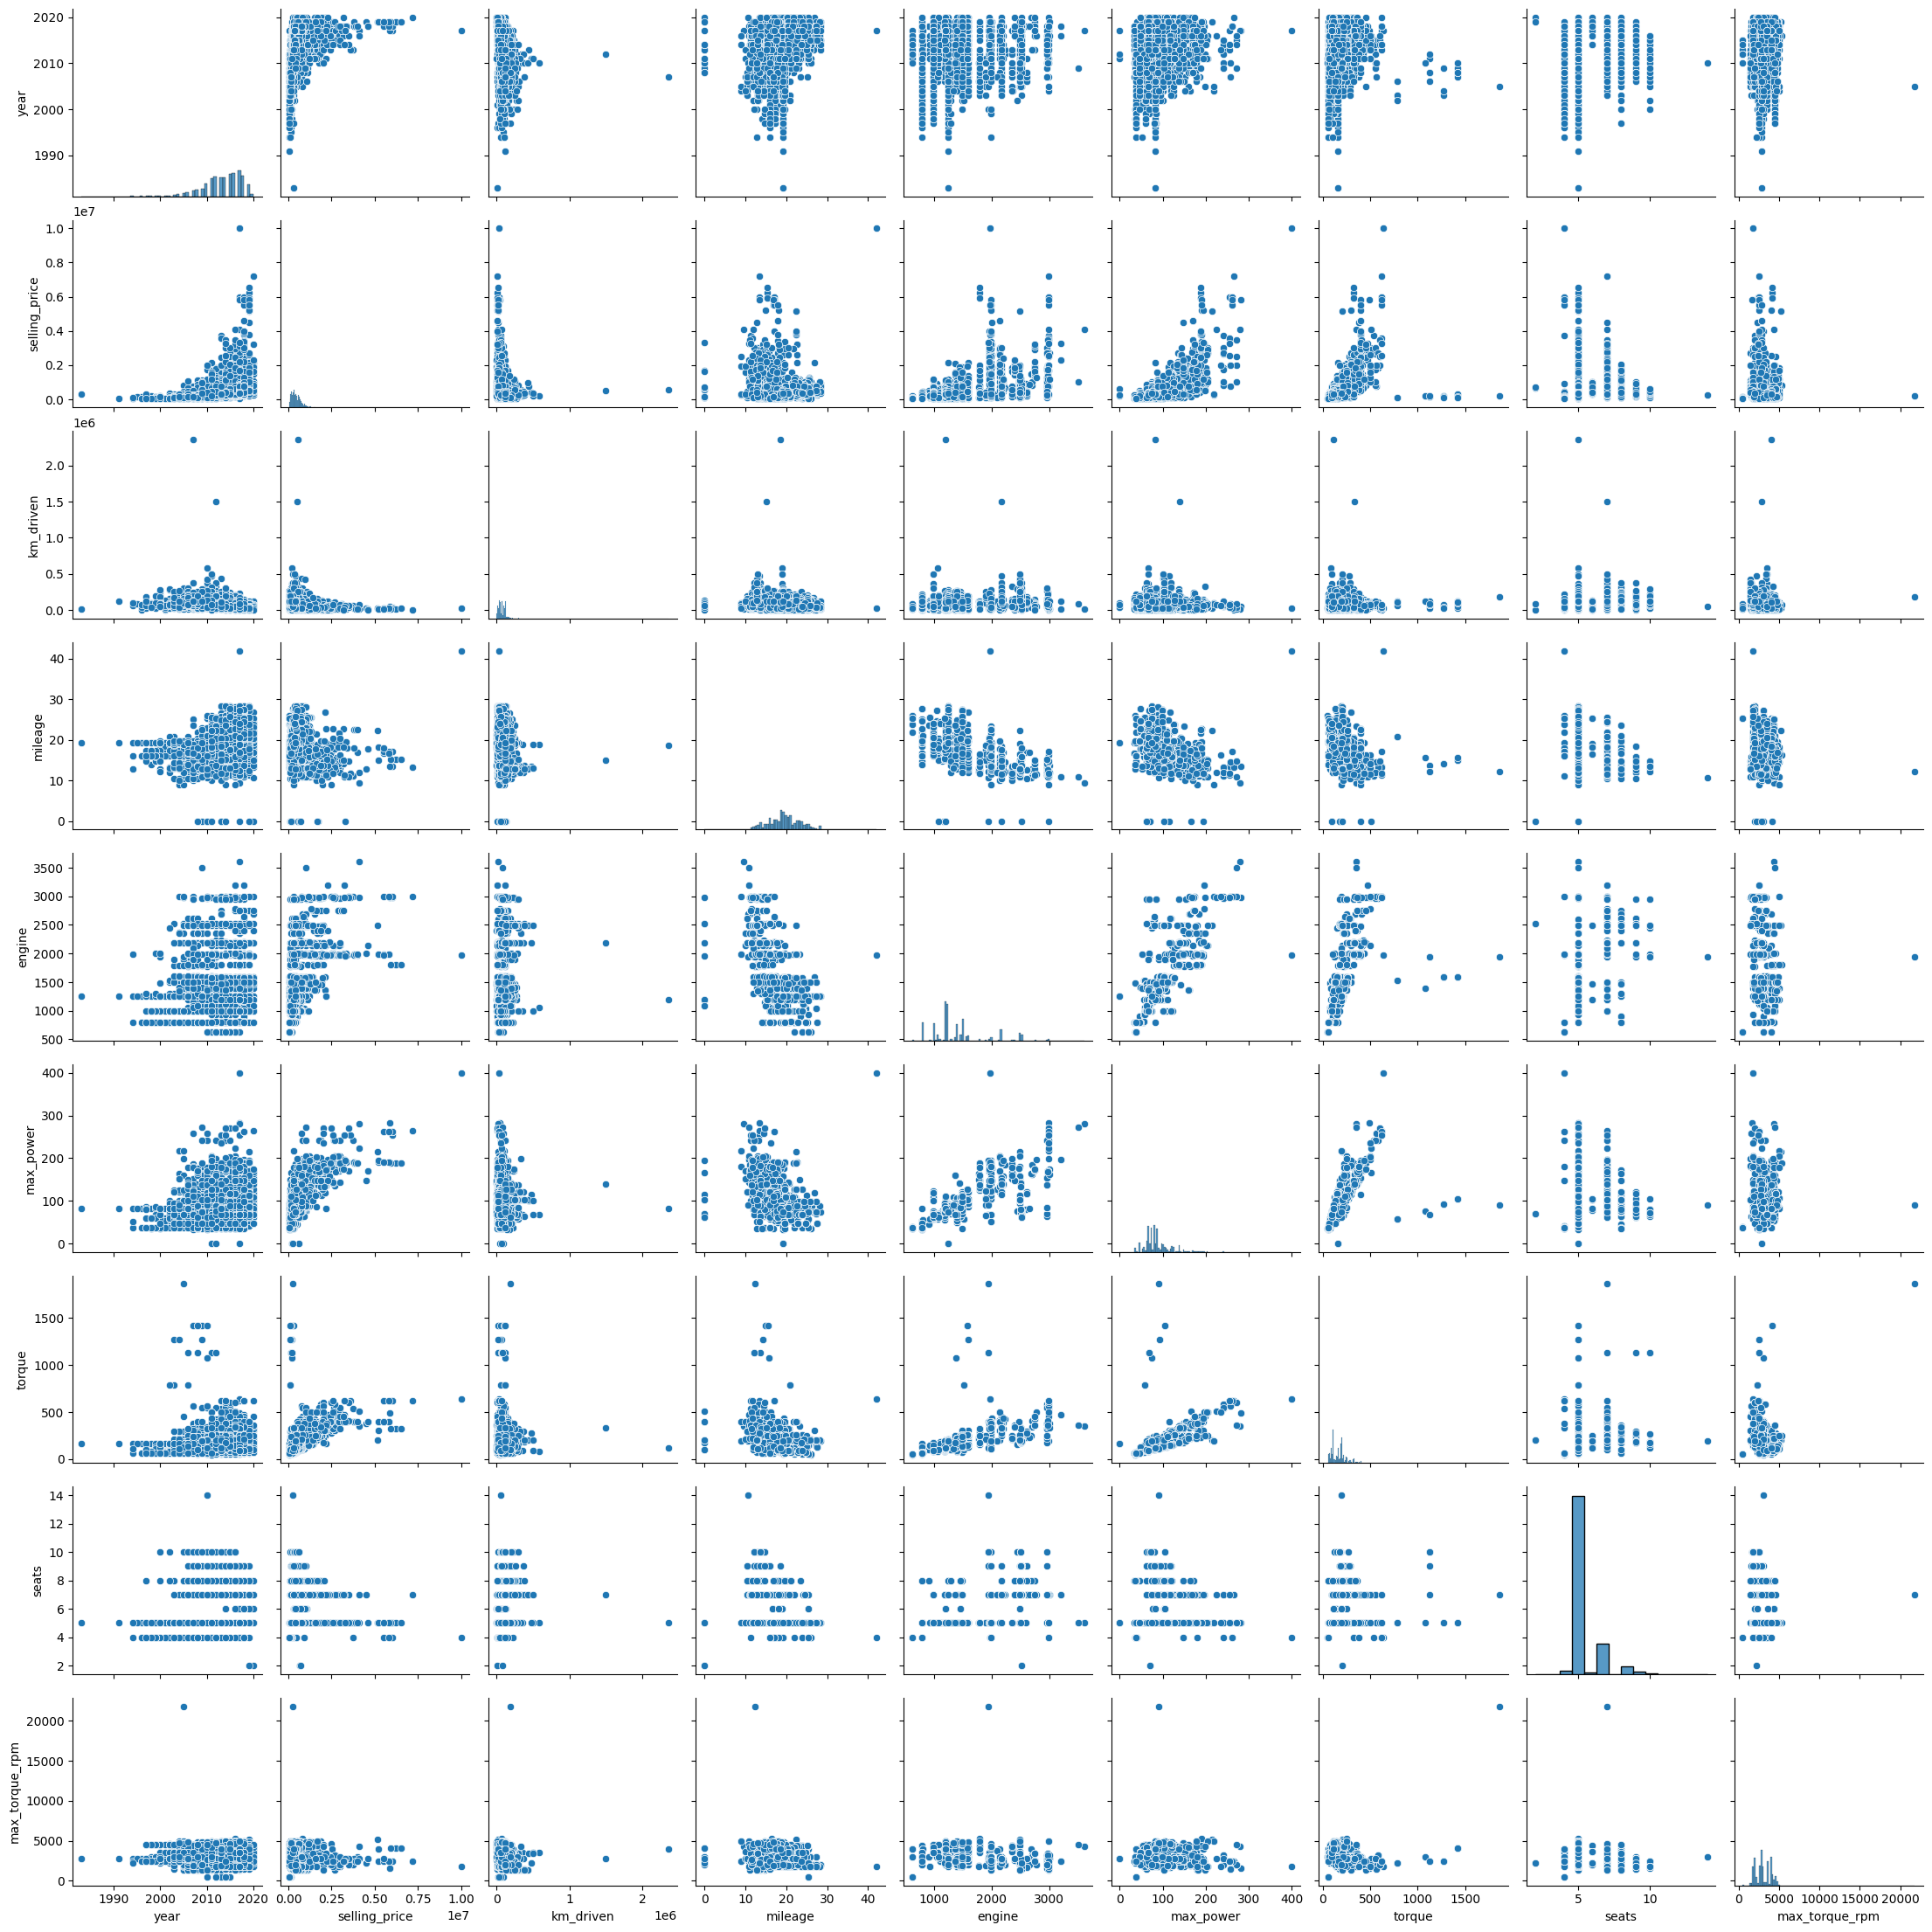

In [ ]:
sns.pairplot(df_train)
plt.show()

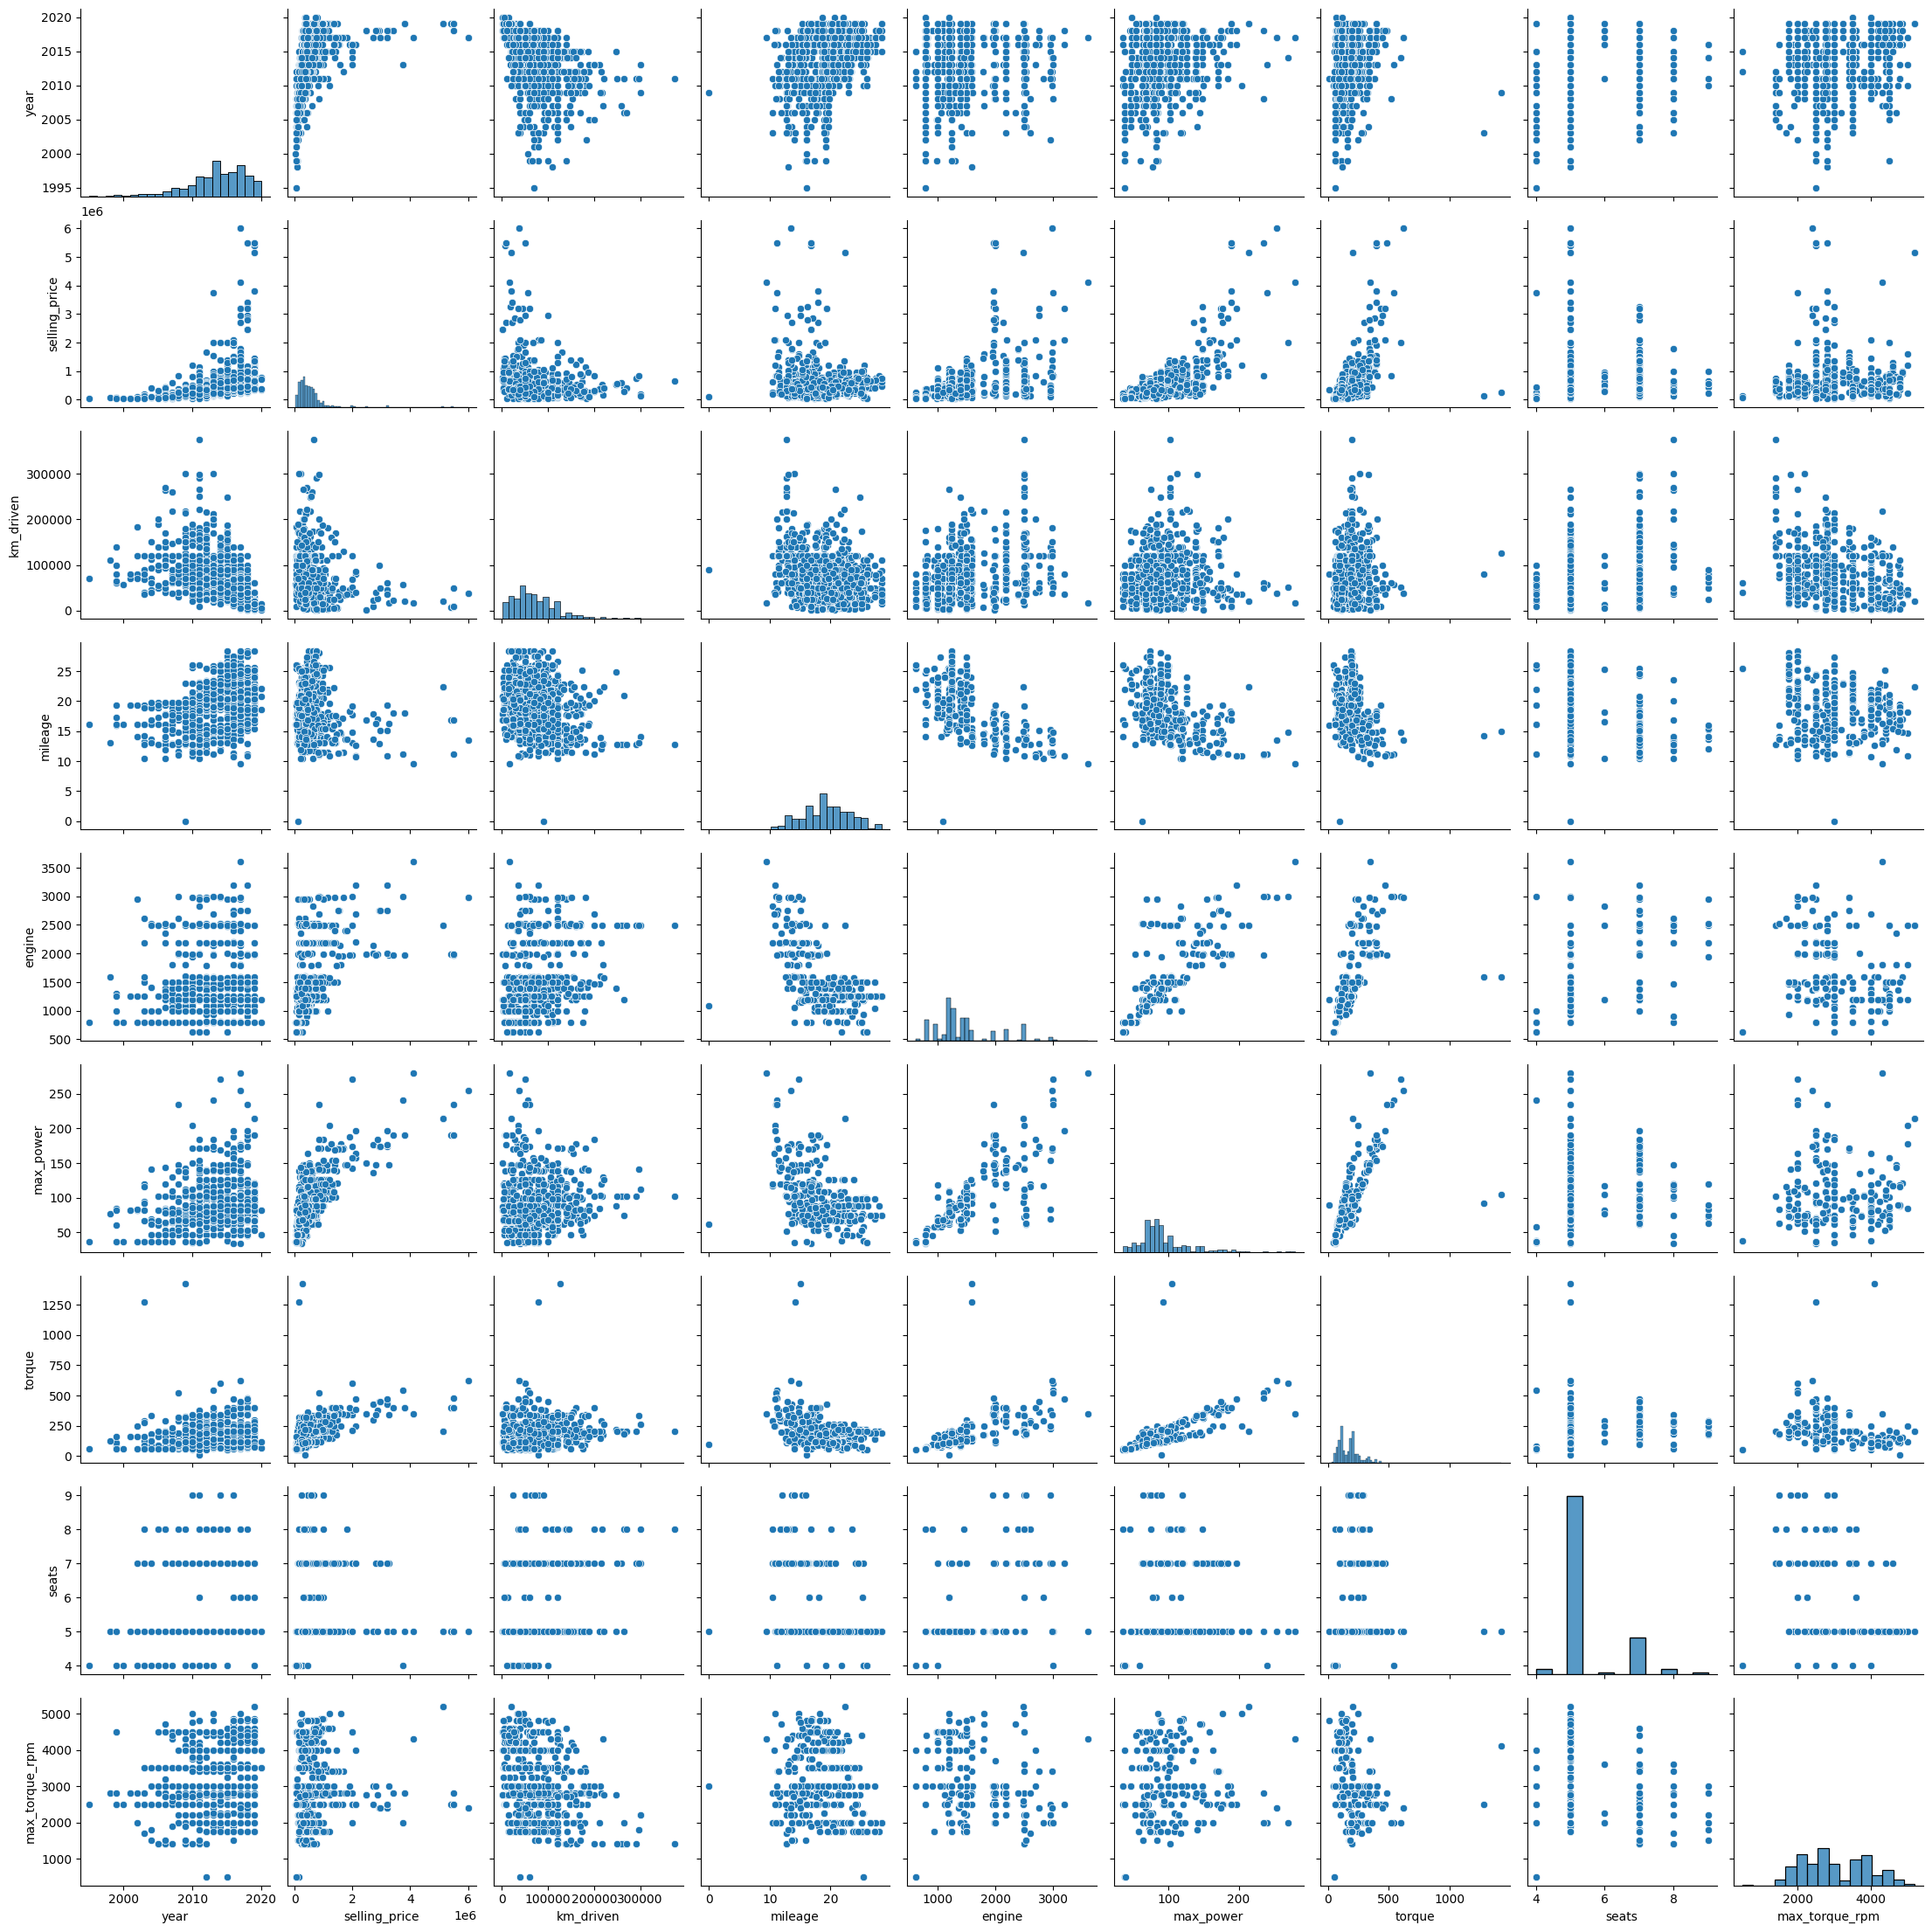

In [ ]:
sns.pairplot(df_test)
plt.show()

**Выводы**:
- На основе распределений можно предположить связь, что существует положительная корреляция между целевой переменной и признаками `engine`, `max_power` и `torque`;
- Распределения признаков в тестовой и тренировочной выборках оказаились очень похожими.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

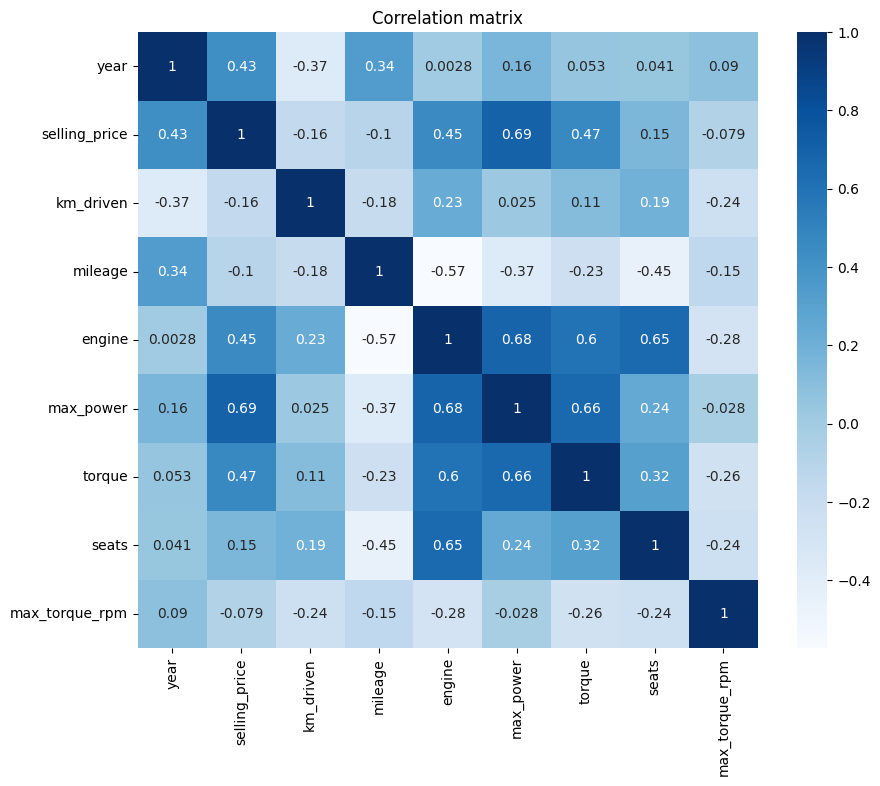

In [ ]:
corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Correlation matrix")
plt.show()

In [ ]:
# Использовал Gemini

abs_corr = corr.abs()
np.fill_diagonal(abs_corr.values, np.nan)
min_corr_value = abs_corr.min().min()
least_correlated_pair = abs_corr[abs_corr == min_corr_value].stack().index.tolist()

print(f"The least correlated features by absolute value are: {least_correlated_pair[0][0]} and {least_correlated_pair[0][1]} with a correlation of {min_corr_value:.4f}")

The least correlated features by absolute value are: year and engine with a correlation of 0.0028


- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

**Ответы**:
- `Year` и `engine` наименее скоррелированы между собой;
- Наиболее сильная положительная зависимость наблюдается между признаками `selling_price` и `max_power`, `engine` и `max_power`;
- Можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи, так как между признаками `year` и `km_driven` существует достаточная отрицательная корреляция (-0.37);
- `pd.corr()` поддерживает корреляции Пирсона (по умолчанию), Спирмена и Кендалла.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [x] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты


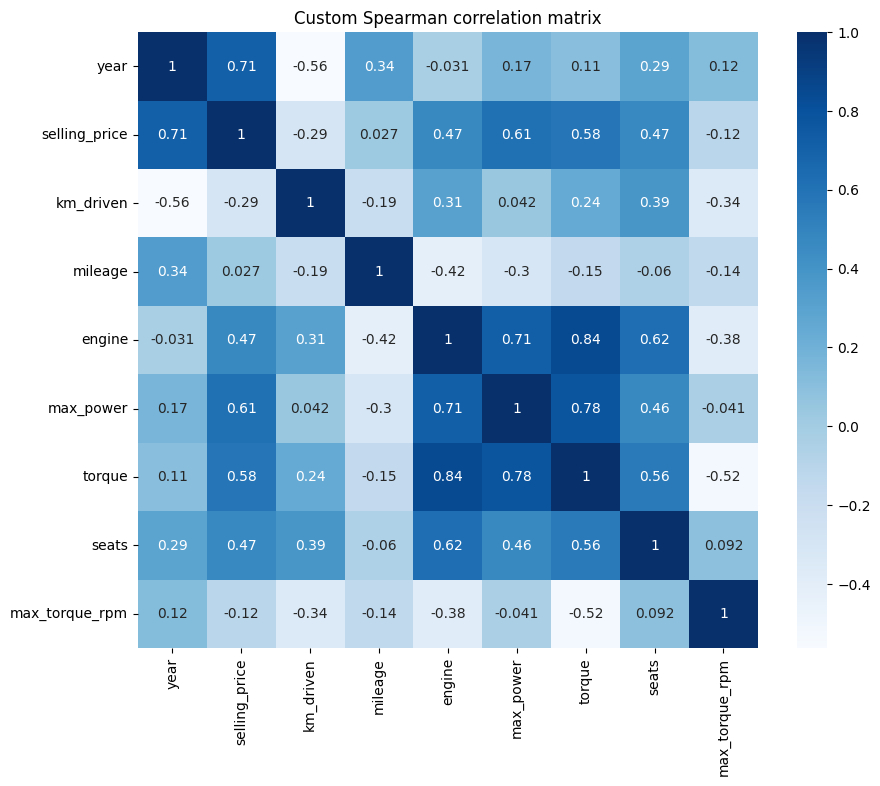

In [30]:
def get_spearman_corr(series1, series2):
    df_temp = pd.DataFrame({'s1': series1, 's2': series2})
    rank1 = df_temp['s1'].rank()
    rank2 = df_temp['s2'].rank()
    d = rank1 - rank2
    n = len(df_temp)
    if n == 0 or n == 1:
        return np.nan
    return 1 - (6 * (d**2).sum()) / (n * (n**2 - 1))

def get_spearman_corr_matrix(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    num_cols = len(numeric_cols)
    corr_matrix = pd.DataFrame(np.nan, index=numeric_cols, columns=numeric_cols)
    for i in range(num_cols):
        for j in range(i, num_cols):
            col_a = numeric_cols[i]
            col_b = numeric_cols[j]
            if col_a == col_b:
                corr_matrix.loc[col_a, col_b] = 1
            else:
                rho = get_spearman_corr(df[col_a], df[col_b])
                corr_matrix.loc[col_a, col_b] = rho
                corr_matrix.loc[col_b, col_a] = rho
    return corr_matrix

spearman_custom_corr = get_spearman_corr_matrix(df_train)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_custom_corr, cmap="Blues", annot=True)
plt.title("Custom Spearman correlation matrix")
plt.show()

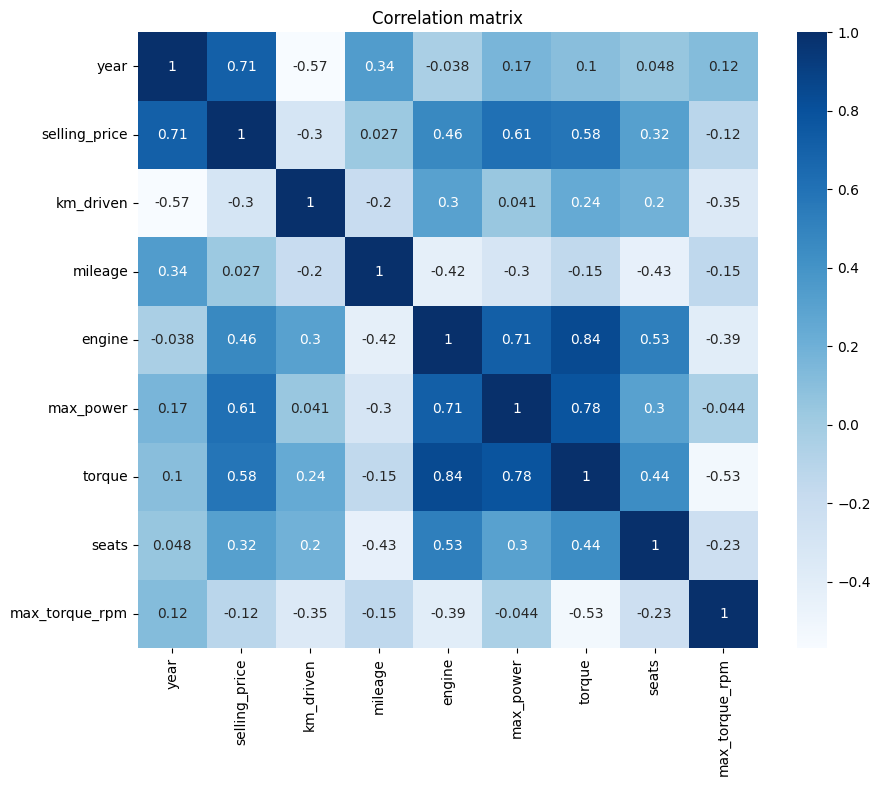

In [ ]:
spearman_corr = df_train.corr(numeric_only=True, method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap="Blues", annot=True)
plt.title("Correlation matrix")
plt.show()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

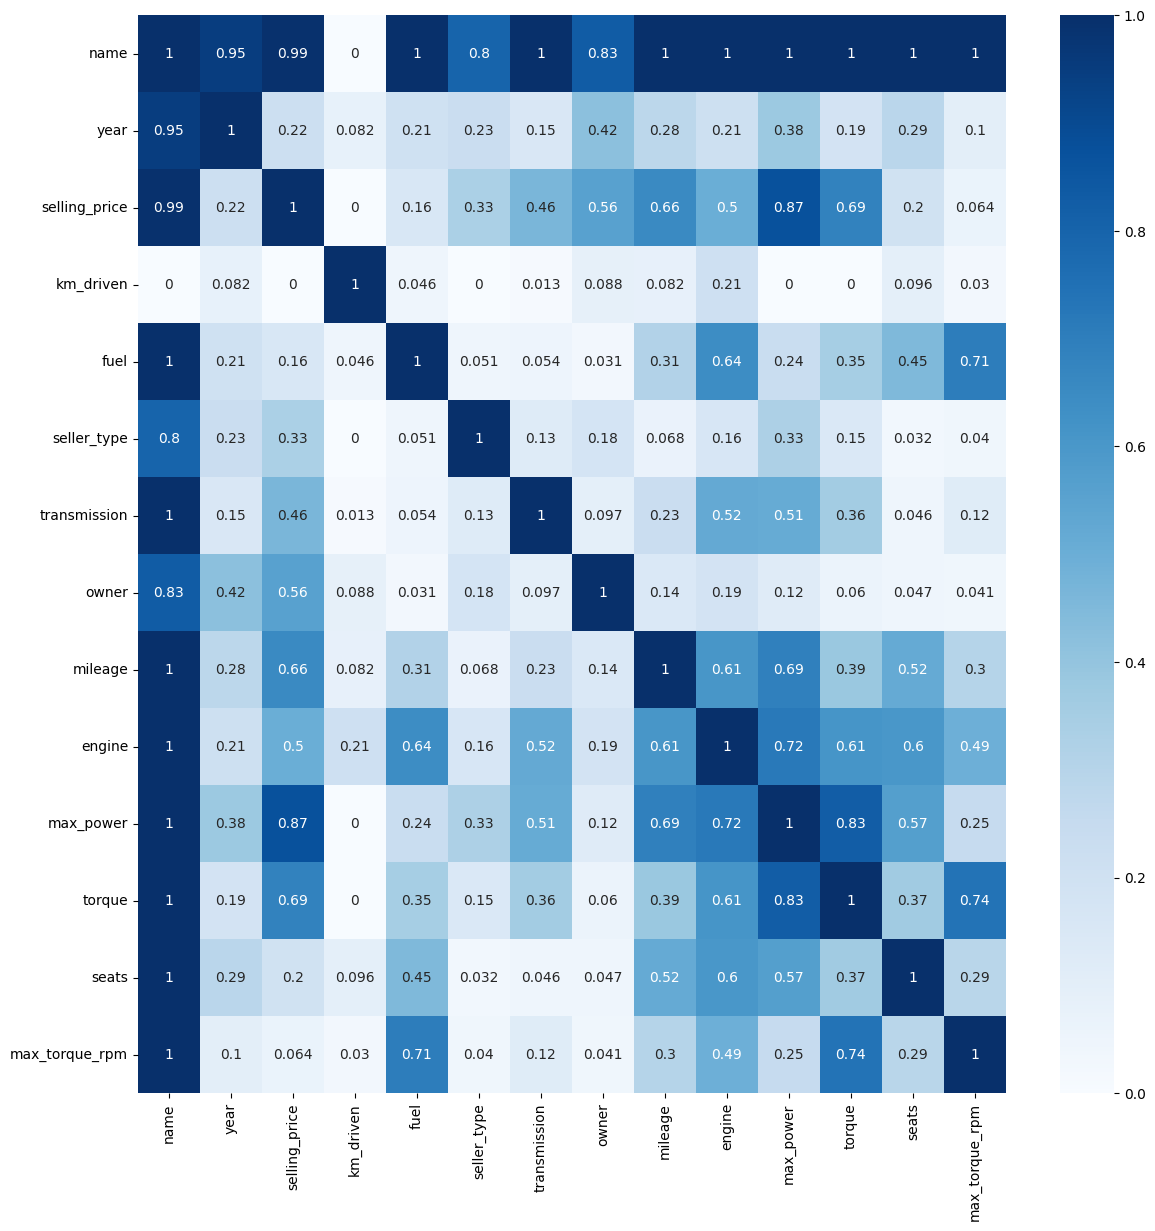

In [ ]:
plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

**Выводы**:
- Собственная реализация корреляции Спирмана и ее `pandas` аналог дают очень близкие результаты;
- Корреляция Спирмана показывает сильную прямую зависимость между целевой переменной и признаками `year` и `seats`.
- `phik` корреляция позволила установить зависимость между целевой переменной и категориальными фичами `name`, `transmission` и `seller_type`.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

Лучше посмотрим на распределение целевой переменной:

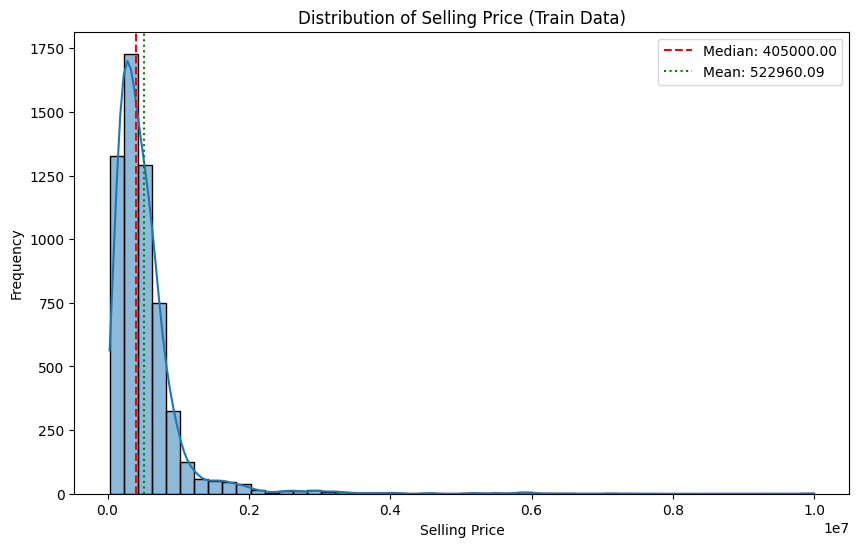

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['selling_price'], kde=True, bins=50)

median_price = df_train['selling_price'].median()
mean_price = df_train['selling_price'].mean()

plt.axvline(median_price, color='red', linestyle='--', label=f'Median: {median_price:.2f}')
plt.axvline(mean_price, color='green', linestyle=':', label=f'Mean: {mean_price:.2f}')

plt.title('Distribution of Selling Price (Train Data)')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Выводы**:
- Распределение смещено вправо и не является нормальным;
- Большинство машин имеют относительно низкую стоимость, в то время как несколько дорогих автомобилей увеличивают среднее значение.

Посмотрим на box графики для некотрых признаков, чтобы лучше определить тип распределения и количество выбросов.

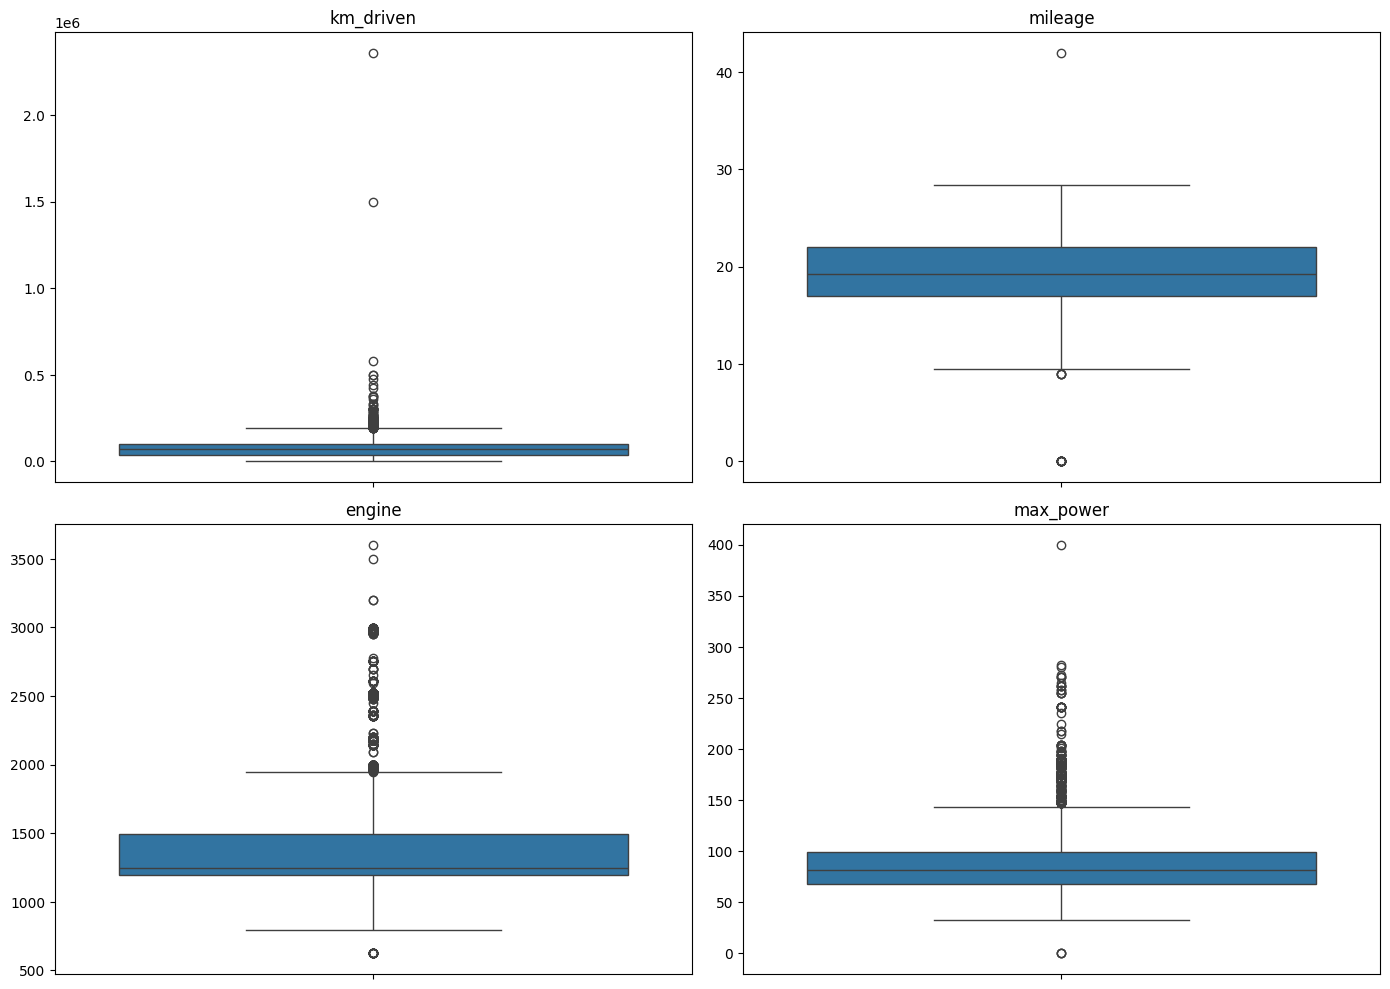

In [135]:
numerical_features_for_boxplot = ['km_driven', 'mileage', 'engine', 'max_power']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_train[feature])
    plt.title(f'{feature}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Выводы**:
- `mileage` нормально распределен, с минимальным количеством выбросов;
- признаки `km_driven`, `engine`и `max_power` имеют много односторонних "выбросов", что говорит о ненормальном распределение и возможной необходимости преобразовать данные признаки, например, через логарифмирование.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [136]:
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
target = 'selling_price'

X_train = df_train[numerical_features]
y_train = df_train[target]

In [137]:
X_test = df_test[numerical_features]
y_test = df_test[target]

Вещественные признаки:
- `year` - год выпуска автомобиля;
- `km_driven` - пробег;
- `mileage` - расход топлива (км на литр);
- `engine` - объем двигателя;
- `max_power` - макс мощность;
- `torque` - крутящий момент;
- `seats` - количество мест;
- `max_torque_rpm` - макс количество оборотов двигателя.

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
def test_performance(model, x_test, y_true):
    y_pred = model.predict(x_test)
    test_mse = MSE(y_true, y_pred)
    test_r2 = r2_score(y_true, y_pred)

    print(f"\nTest Performance:")
    print(f"   MSE:  {test_mse:.4f}")
    print(f"   R²:   {test_r2:.3f}")

In [140]:
print("Train:")
test_performance(model, X_train, y_train)

print("\n\nTest:")
test_performance(model, X_test, y_test)

Train:

Test Performance:
   MSE:  114135745859.5444
   R²:   0.602


Test:

Test Performance:
   MSE:  229166637769.7081
   R²:   0.601


### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [141]:
def custom_r2(y_true, y_pred):
    y_true_mean = np.mean(y_true)
    mse = np.sum((y_true - y_pred)**2)
    std = np.sum((y_true - y_true_mean)**2)
    if std == 0:
        return 1.0 if mse == 0 else 0.0
    return 1 - (mse / std)

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}, $$
где:
- $y_i$ - правильный ответ;
- $\hat{y}_i$ - ответ модели;
- $\bar{y}$ - среднее из правильных ответов.

In [142]:
print(f"R²:   {custom_r2(y_test, model.predict(X_test)):.3f}")

R²:   0.601


### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [143]:
def custom_adjusted_r2(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = custom_r2(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

$$ \text{Adjusted } R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}, $$
где:
- $n$ - количество элементов в выборке;
- $p$ - количество признаков.

$\text{Adjusted}-R^2$ применяется для определения важности найденных признаков (из формулы видно, что чем больше фич, чем ниже метрика). Соответственно если у модели $A$, где $p=7$, метрика выше, чем у модели $B$, где $p=10$, то можно сделать вывод о том, что 3 новые фичи не вносят достаточный вклад в эффективность предсказаний, и их можно удалить.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [146]:
print("Train:")
test_performance(model_scaled, X_train_scaled, y_train)

print("\n\nTest:")
test_performance(model_scaled, X_test_scaled, y_test)

Train:

Test Performance:
   MSE:  114135745859.5443
   R²:   0.602


Test:

Test Performance:
   MSE:  229166637769.6995
   R²:   0.601


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [147]:
# Использовал Gemini

coefficients = model_scaled.coef_
feature_names = numerical_features

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance based on Standardized Coefficients:")
display(coef_df)

most_informative_feature = coef_df.iloc[0]['Feature']
print(f"\nThe most informative feature in predicting selling price is: '{most_informative_feature}'")

Feature Importance based on Standardized Coefficients:


Feature    Coefficient  Abs_Coefficient
4       max_power  329432.127659    329432.127659
0            year  169058.266005    169058.266005
7  max_torque_rpm  -62789.321599     62789.321599
1       km_driven  -50131.936729     50131.936729
6           seats  -31919.744777     31919.744777
3          engine   16842.653027     16842.653027
2         mileage  -12016.439885     12016.439885
5          torque    9619.212657      9619.212657


The most informative feature in predicting selling price is: 'max_power'


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [148]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(random_state=42))
])
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(random_state=42))])

In [149]:
print("Train:")
test_performance(lasso_pipeline, X_train, y_train)

print("\n\nTest:")
test_performance(lasso_pipeline, X_test, y_test)

Train:

Test Performance:
   MSE:  114135745873.4989
   R²:   0.602


Test:

Test Performance:
   MSE:  229167397866.4326
   R²:   0.601


In [150]:
# Использовал Gemini

lasso_model = lasso_pipeline.named_steps['model']
lasso_coefficients = lasso_model.coef_

feature_names = numerical_features

lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Lasso_Coefficient': lasso_coefficients})

print("Lasso Coefficients:")
display(lasso_coef_df.sort_values(by='Lasso_Coefficient', ascending=False))

Lasso Coefficients:


Feature  Lasso_Coefficient
4       max_power      329433.466155
0            year      169055.963879
3          engine       16840.883100
5          torque        9618.509761
2         mileage      -12013.040060
6           seats      -31915.716797
1       km_driven      -50130.946198
7  max_torque_rpm      -62787.057460

L1 регуляризация не занулила ни одного параметра, что говорит о том, что все признаки вносят достаточный вклад в предсказание целевой переменной и являются линейно независимыми.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

**Ответы**:
- Грид серч будет обучать 160 моделей;
- $\alpha$ - коэффициент регуляризации ($+ \alpha \cdot |w| $),
`fit_intercept` - добавление сдвига, `selection` - вариант координатного спуска (алгоритм обучения LASSO модели).

In [98]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


gs_lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42, max_iter=2000))
])

param_grid = {
    'lasso__alpha': np.logspace(-3, 1, 40), # from 0.001 to 10
    'lasso__fit_intercept': [True, False],
    'lasso__selection': ['cyclic', 'random']
}

grid_search_lasso = GridSearchCV(
    estimator=gs_lasso_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search_lasso.fit(X_train, y_train)

print(f"Best parameters for Lasso: {grid_search_lasso.best_params_}")
print(f"Best MSE score for Lasso: {grid_search_lasso.best_score_:.3f}")

best_lasso_model_pipeline = grid_search_lasso.best_estimator_

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best parameters for Lasso: {'lasso__alpha': np.float64(10.0), 'lasso__fit_intercept': True, 'lasso__selection': 'cyclic'}
Best MSE score for Lasso: -119127291668.629


In [47]:
print("Train:")
test_performance(best_lasso_model_pipeline, X_train, y_train)

print("\n\nTest:")
test_performance(best_lasso_model_pipeline, X_test, y_test)

Train:

Test Performance:
   MSE:  114135747278.3631
   R²:   0.602


Test:

Test Performance:
   MSE:  229174257837.9484
   R²:   0.601


In [48]:
lasso_coefficients = best_lasso_model_pipeline.named_steps['lasso'].coef_

feature_names = numerical_features

lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Lasso_Coefficient': lasso_coefficients})

print("Lasso Coefficients:")
display(lasso_coef_df.sort_values(by='Lasso_Coefficient', ascending=False))

Lasso Coefficients:


Feature  Lasso_Coefficient
4       max_power      329445.608214
0            year      169034.782836
3          engine       16825.296127
5          torque        9612.132660
2         mileage      -11981.737370
6           seats      -31879.245421
1       km_driven      -50122.098371
7  max_torque_rpm      -62766.413059

**Выводы**:
- Лучшая LASSO модель достигаеться при $\alpha = 10$, `fit_intercept = True` и `selection = cyclic`;
- Результат совпадает с предыдущими моделями;
- Никакие признаки не занулились.

Заметим, что `GridSearchCV` показал модель с $\alpha = 10$, как лучшую, так как она была последней. На самом деле все LASSO модели показывают идентичный результат (проверял с $\alpha = 1, 100$). Таким образом можно заключить, что LASSO регуляризация не влияет на качество предсказания модели. Причиной такого эффекта может быть тот факт, что каждый признак вносит ощутимый вклад, а также достаточная независимость признаков друг от друга.

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

$$ L(\mathbf{w}) = \frac{1}{2n_{\text{samples}}} \| \mathbf{y} - \mathbf{X}\mathbf{w} \|_2^2 + \alpha \rho \| \mathbf{w} \|_1 + \frac{1}{2} \alpha (1-\rho) \| \mathbf{w} \|_2^2, $$
где:
- $\alpha$ - сила регуляризации;
- $\rho$  - `l1_ratio` параметр. Контролирует баланс между L1 и L2 регуляризациями.

In [49]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

gs_elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(random_state=42, max_iter=2000))
])

param_grid = {
    'elasticnet__alpha': np.logspace(-3, 1, 40), # from 0.001 to 10
    'elasticnet__l1_ratio': np.linspace(0, 1, 10), # 0 for L2, 1 for L1
    'elasticnet__fit_intercept': [True, False],
    'elasticnet__selection': ['cyclic', 'random']
}

grid_search_elasticnet = GridSearchCV(
    estimator=gs_elasticnet_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search_elasticnet.fit(X_train, y_train)

print(f"Best parameters for ElasticNet: {grid_search_elasticnet.best_params_}")
print(f"Best MSE score for ElasticNet: {grid_search_elasticnet.best_score_:.3f}")

best_elasticnet_model_pipeline = grid_search_elasticnet.best_estimator_

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters for ElasticNet: {'elasticnet__alpha': np.float64(0.017012542798525893), 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': np.float64(0.2222222222222222), 'elasticnet__selection': 'random'}
Best MSE score for ElasticNet: -119072547242.938


In [50]:
print("Train:")
test_performance(best_elasticnet_model_pipeline, X_train, y_train)

print("\n\nTest:")
test_performance(best_elasticnet_model_pipeline, X_test, y_test)

Train:

Test Performance:
   MSE:  114184853867.8895
   R²:   0.602


Test:

Test Performance:
   MSE:  231027002218.5456
   R²:   0.598


**Выводы**:
- `GridSearch` обучил 1600 моделей;
- Лучшие гиперпараметры: $ \alpha = 0.017 $, $ l^1_{ratio} = 0.22$, `fit_intercept = True` и `selection = random`.

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [x] Реализуйте модель с $L0$-регуляризаицей.
- [x] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [x] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



$$ L(\mathbf{w}) = \| \mathbf{y} - \mathbf{X}\mathbf{w} \|_2^2 + \lambda \| \mathbf{w} \|_0, $$
где:
- $\lambda$ - сила регуляризации;
- $\| \mathbf{w} \|_0$  - количество ненулевых весов.

In [51]:
# Частично использовал Deepseek

from sklearn.linear_model import LinearRegression


class L0Regularization():
    """
    L0 Regularization - методом подбора подмножества не нулевых коэффициентов.
    Генерируются все возможные множества фичей, после чего происходит обучение и ищется наилучшая модель.
    Признаки которые не попали в множество получают нулевой коэффициент.
    """

    def __init__(self, lambda_val=1.0):
        self.lambda_val = lambda_val

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = X

        if isinstance(y, pd.Series):
            y_array = y.values
        else:
            y_array = y

        n_samples, n_features = X_array.shape

        best_score = float('inf')
        best_subset = []
        best_model = None

        for subset_mask in range(2**n_features):
            selected_features = [i for i in range(n_features) if (subset_mask >> i) & 1]

            if not selected_features:
                continue

            X_subset = X_array[:, selected_features]
            model = LinearRegression()
            model.fit(X_subset, y_array)

            y_pred = model.predict(X_subset)
            mse = np.mean((y_array - y_pred) ** 2)

            k = len(selected_features)
            score = mse + self.lambda_val * k

            if score < best_score:
                best_score = score
                best_subset = selected_features
                best_model = model

        self.selected_features_ = best_subset
        self.model_ = best_model

        self.coef_ = np.zeros(n_features)
        if best_subset:
            self.coef_[best_subset] = best_model.coef_
            self.intercept_ = best_model.intercept_
        else:
            self.intercept_ = np.mean(y_array)

        return self

    def predict(self, X):
        if not hasattr(self, 'model_'):
            raise ValueError("Model not fitted yet!")

        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = X

        if self.selected_features_:
            return self.model_.predict(X_array[:, self.selected_features_])
        else:
            return np.full(X_array.shape[0], self.intercept_)

In [52]:
for lambda_val in [0.1, 1.0, 10.0]:
    l0 = L0Regularization(lambda_val=lambda_val)
    l0.fit(X_train, y_train)

    non_zero = np.sum(np.abs(l0.coef_) > 0.01)
    print(f"\n   λ = {lambda_val}:")
    print(f"   Selected {len(l0.selected_features_)} features: {l0.selected_features_}")
    print(f"   Coefficients: {l0.coef_.round(3)}")
    print(f"   Non-zero coefficients: {non_zero}/{X_train.shape[1]}")
    print(f"   MSE: {MSE(y_test, l0.predict(X_test))}")
    print(f"   R²:  {r2_score(y_test, l0.predict(X_test))}")


   λ = 0.1:
   Selected 8 features: [0, 1, 2, 3, 4, 5, 6, 7]
   Coefficients: [ 4.1281335e+04 -8.3500000e-01 -3.0664590e+03  3.4683000e+01
  1.0412642e+04  8.9785000e+01 -3.2496233e+04 -6.7207000e+01]
   Non-zero coefficients: 8/8
   MSE: 229166637769.70825
   R²:  0.6013304566695022

   λ = 1.0:
   Selected 8 features: [0, 1, 2, 3, 4, 5, 6, 7]
   Coefficients: [ 4.1281335e+04 -8.3500000e-01 -3.0664590e+03  3.4683000e+01
  1.0412642e+04  8.9785000e+01 -3.2496233e+04 -6.7207000e+01]
   Non-zero coefficients: 8/8
   MSE: 229166637769.70825
   R²:  0.6013304566695022

   λ = 10.0:
   Selected 8 features: [0, 1, 2, 3, 4, 5, 6, 7]
   Coefficients: [ 4.1281335e+04 -8.3500000e-01 -3.0664590e+03  3.4683000e+01
  1.0412642e+04  8.9785000e+01 -3.2496233e+04 -6.7207000e+01]
   Non-zero coefficients: 8/8
   MSE: 229166637769.70825
   R²:  0.6013304566695022


**Выводы**:
- L0 модель не занулила ни один из параметров, что подтверждает результат работы LASSO, где был получен схожий результат.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления - Применим `target-encoding` со сглаживанием.

In [46]:
# Использовал Gemini

class TargetEncoder:

    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing
        self.global_mean = 0
        self.target_map = {}

    def fit(self, X, y):
        self.global_mean = y.mean()
        for category in X.unique():
            category_mean = y[X == category].mean()
            category_count = (X == category).count()
            smoothed_mean = (category_count * category_mean + self.smoothing * self.global_mean) / (category_count + self.smoothing)
            self.target_map[category] = smoothed_mean

    def transform(self, X):
        return X.map(lambda x: self.target_map.get(x, self.global_mean))

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [86]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()

In [87]:
target_encoder = TargetEncoder(smoothing=1.0)
X_train_cat['name'] = target_encoder.fit_transform(X_train_cat['name'], X_train_cat['selling_price'])
X_test_cat['name'] = target_encoder.transform(X_test_cat['name'])
X_train_cat = X_train_cat.drop('selling_price', axis=1)
X_test_cat = X_test_cat.drop('selling_price', axis=1)

In [49]:
assert X_train_cat.shape == (5840, 13)

In [50]:
X_train_cat.head()

name  year  km_driven    fuel seller_type transmission  \
0  584582.799815  2014     145500  Diesel  Individual       Manual   
1  539997.082707  2014     120000  Diesel  Individual       Manual   
2  225051.011829  2010     127000  Diesel  Individual       Manual   
3  150063.852096  2007     120000  Petrol  Individual       Manual   
4  470009.066956  2017      45000  Petrol  Individual       Manual   

          owner    mileage  engine   max_power  torque  seats  max_torque_rpm  
0   First Owner  23.400000    1248   74.000000  190.00      5          2000.0  
1  Second Owner  21.139999    1498  103.519997  250.00      5          2500.0  
2   First Owner  23.000000    1396   90.000000  219.67      5          2750.0  
3   First Owner  16.100000    1298   88.199997  112.78      5          4500.0  
4   First Owner  20.139999    1197   81.860001  113.75      5          4000.0

In [51]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [88]:
from sklearn.preprocessing import OneHotEncoder

ohe_categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_ohe = encoder.fit_transform(X_train_cat[ohe_categorical_features])
X_test_ohe = encoder.transform(X_test_cat[ohe_categorical_features])

ohe_feature_names = encoder.get_feature_names_out(ohe_categorical_features)

X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train_cat.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test_cat.index)

X_train_cat = X_train_cat.drop(columns=ohe_categorical_features)
X_test_cat = X_test_cat.drop(columns=ohe_categorical_features)

X_train_cat = pd.concat([X_train_cat, X_train_ohe_df], axis=1)
X_test_cat = pd.concat([X_test_cat, X_test_ohe_df], axis=1)

In [89]:
X_train_cat.head()

name  year  km_driven    mileage  engine   max_power  torque  \
0  584582.799815  2014     145500  23.400000    1248   74.000000  190.00   
1  539997.082707  2014     120000  21.139999    1498  103.519997  250.00   
2  225051.011829  2010     127000  23.000000    1396   90.000000  219.67   
3  150063.852096  2007     120000  16.100000    1298   88.199997  112.78   
4  470009.066956  2017      45000  20.139999    1197   81.860001  113.75   

   max_torque_rpm  fuel_CNG  fuel_Diesel  ...  owner_Third Owner  seats_2  \
0          2000.0       0.0          1.0  ...                0.0      0.0   
1          2500.0       0.0          1.0  ...                0.0      0.0   
2          2750.0       0.0          1.0  ...                0.0      0.0   
3          4500.0       0.0          0.0  ...                0.0      0.0   
4          4000.0       0.0          0.0  ...                0.0      0.0   

   seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  seats_10  seats_14  
0      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
1      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
2      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
3      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  
4      0.0      1.0      0.0      0.0      0.0      0.0       0.0       0.0  

[5 rows x 31 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

**Ответы**:
- Правильно обучить OHE (создать категории) на train выборке, а потом применить кодирование на test, где категории не из train будут игнорироваться. Это делается для предотвращения утечки данных из test в train;
- Один из столбцов OHE можно выразить через все остальные, таким образом признаки становяться линейно зависимыми, что будет мешать сходимости алгоритма обучения (без регуляризации). Поэтому один столбец OHE удаляется;
- Удаление части OHE столбцов может нарушить интерпретируемость закодированного признака, поэтому лучше провести рекатегоризацию, например, заменить неважные значения категориального признака на `other` и сделать OHE.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


gs_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 100)
}

grid_search_ridge = GridSearchCV(
    estimator=gs_ridge_pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search_ridge.fit(X_train_cat, y_train)

print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")
print(f"Best R² score for Ridge: {grid_search_ridge.best_score_:.3f}")

best_ridge_model_pipeline = grid_search_ridge.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters for Ridge: {'ridge__alpha': np.float64(0.001)}
Best R² score for Ridge: 0.959


In [55]:
print("Train:")
test_performance(best_ridge_model_pipeline, X_train_cat, y_train)

print("\n\nTest:")
test_performance(best_ridge_model_pipeline, X_test_cat, y_test)

Train:

Test Performance:
   MSE:  9697886553.8804
   R²:   0.966


Test:

Test Performance:
   MSE:  69801792748.7933
   R²:   0.879


**Выводы**:
- Обученная модель улучшила качество прогнозов в сравнении с LASSO, L0 и ElasticNet на вещественных признаках.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [90]:
# Сохраним признаки полученные до этого момента
X_train_cat_old = X_train_cat.copy()
X_test_cat_old = X_test_cat.copy()

Добавим категориальный признак 'сompany` - компания, которая произвела автомобиль (первое слово в его названии).

In [91]:
X_train_cat['company'] = df_train['name'].apply(lambda x: x.split(' ')[0])
X_test_cat['company'] = df_test['name'].apply(lambda x: x.split(' ')[0])

In [92]:
X_train_cat['company'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [93]:
# Применим target-encoding

target_encoder = TargetEncoder(smoothing=1.0)
X_train_cat['company'] = target_encoder.fit_transform(X_train_cat['company'], y_train)
X_test_cat['company'] = target_encoder.transform(X_test_cat['company'])

Прологарифмируем признак `km_driven`:

In [94]:
X_train_cat['km_driven'] = np.log1p(X_train_cat['km_driven'])
X_test_cat['km_driven'] = np.log1p(X_test_cat['km_driven'])

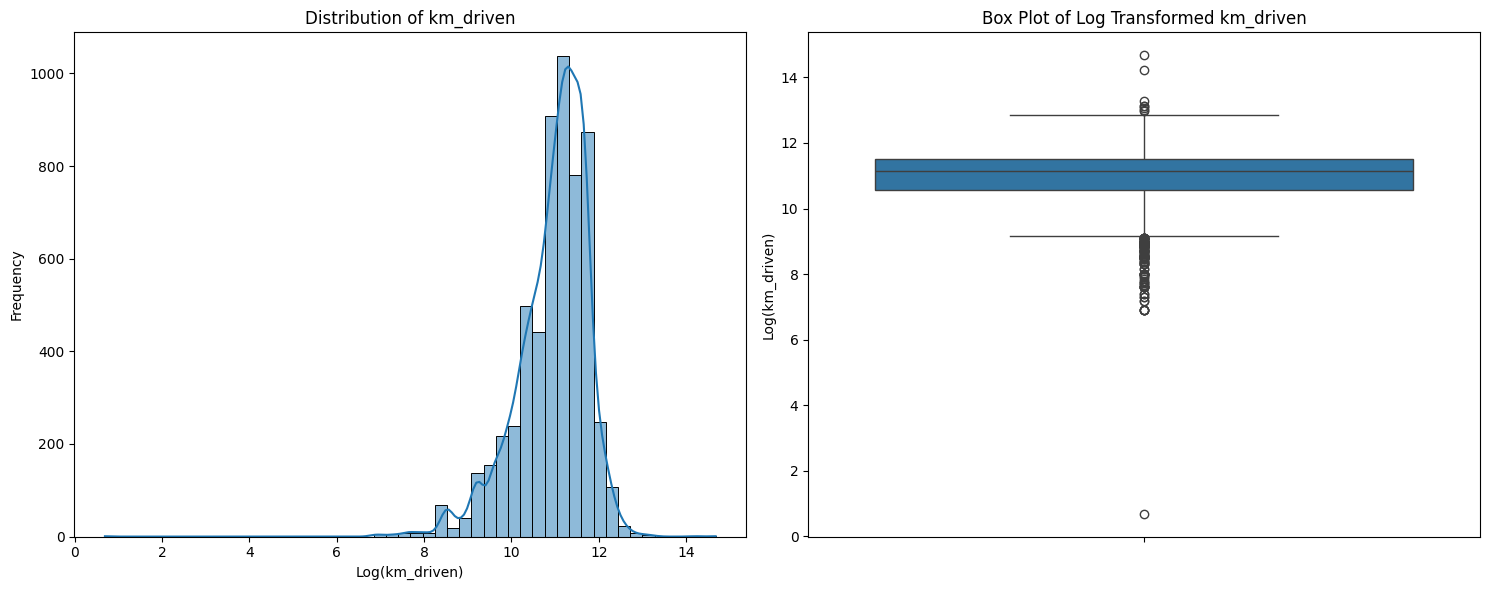

In [60]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.histplot(X_train_cat['km_driven'], kde=True, bins=50)
plt.title('Distribution of km_driven')
plt.xlabel('Log(km_driven)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train_cat['km_driven'])
plt.title('Box Plot of Log Transformed km_driven')
plt.ylabel('Log(km_driven)')

plt.tight_layout()
plt.show()

Стало немного лучше - распределение более симметрично.

Конвертируем OHE признаки в `int32`, чтобы оптимизировать обучение:

In [95]:
for col in ohe_feature_names:
    if col in X_train_cat.columns:
        X_train_cat[col] = X_train_cat[col].astype(np.int32)
    if col in X_test_cat.columns:
        X_test_cat[col] = X_test_cat[col].astype(np.int32)

In [67]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          5840 non-null   float64
 1   year                          5840 non-null   int64  
 2   km_driven                     5840 non-null   float64
 3   mileage                       5840 non-null   float32
 4   engine                        5840 non-null   int64  
 5   max_power                     5840 non-null   float32
 6   torque                        5840 non-null   float64
 7   max_torque_rpm                5840 non-null   float64
 8   fuel_CNG                      5840 non-null   int32  
 9   fuel_Diesel                   5840 non-null   int32  
 10  fuel_LPG                      5840 non-null   int32  
 11  fuel_Petrol                   5840 non-null   int32  
 12  seller_type_Dealer            5840 non-null   int32  
 13  sel

Натренируем линейную регрессию с полиномиальными признаками и `GridSearchCV`:

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


base_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

param_grids = {
    'ridge': {
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    },
    'lasso': {
        'model': [Lasso(max_iter=2000)],
        'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    },
    'elastic': {
        'model': [ElasticNet(max_iter=2000)],
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    }
}

results = {}

for model_name, param_grid in param_grids.items():
    print(f"\n{'='*60}")
    print(f"Tuning {model_name.upper()} with 10-fold CV...")
    print('='*60)

    grid_search = GridSearchCV(
        base_pipeline,
        param_grid,
        cv=10,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_cat, y_train)

    best_model = grid_search.best_estimator_
    cv_r2 = grid_search.best_score_

    results[model_name] = {
        'model': best_model,
        'cv_r2': cv_r2,
        'best_params': grid_search.best_params_,
        'grid_search': grid_search
    }

    print(f"Best CV R²: {cv_r2:.4f}")
    print(f"Best params: {grid_search.best_params_}")

    test_performance(best_model, X_test_cat, y_test)


Tuning RIDGE with 10-fold CV...
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best CV R²: 0.9597
Best params: {'model': Ridge(), 'model__alpha': 100.0}

Test Performance:
   MSE:  59961761883.0942
   R²:   0.896

Tuning LASSO with 10-fold CV...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best CV R²: 0.9529
Best params: {'model': Lasso(max_iter=2000), 'model__alpha': 10.0}

Test Performance:
   MSE:  65701257751.8277
   R²:   0.886

Tuning ELASTIC with 10-fold CV...
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best CV R²: 0.9598
Best params: {'model': ElasticNet(max_iter=2000), 'model__alpha': 0.1, 'model__l1_ratio': 0.5}

Test Performance:
   MSE:  59579627008.2747
   R²:   0.896


Лучшей моделью оказалась `ElasticNet, alpha: 0.1, l1_ratio: 0.5`

Сохраним лучшую модель:

In [71]:
best_model = results['elastic']['model']

In [72]:
filename = 'best_model.pickle'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [75]:
def business_metrics(y_true, y_pred, tolerance=0.10):
    diff = np.abs((y_true - y_pred) / y_true)
    filtered_diff = (diff <= tolerance).sum()
    return filtered_diff / len(y_true)

In [100]:
print(f"Lasso + Numerical features: {float(business_metrics(y_test, best_lasso_model_pipeline.predict(X_test)))}")
print(f"Ridge + Categorial features: {float(business_metrics(y_test, best_ridge_model_pipeline.predict(X_test_cat_old)))}")
print(f"ElasticNet + Custom features: {float(business_metrics(y_test, best_model.predict(X_test_cat)))}")

Lasso + Numerical features: 0.243
Ridge + Categorial features: 0.38
ElasticNet + Custom features: 0.415


Последняя натренированная модель, которая показала лучшие MSE и R2 метрики, показала и лучшую бизнес метрику.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса



In [102]:
UNDERPREDICTION_TOLERANCE = 0.2
OVERPREDICTION_TOLERANCE = 0.05


def your_business_metrics(y_true, y_pred):
    diff = (y_pred - y_true) / y_true
    good_predictions = ((diff >= -UNDERPREDICTION_TOLERANCE) & (diff <= OVERPREDICTION_TOLERANCE)).sum()
    return good_predictions / len(y_true)

In [103]:
print(f"Lasso + Numerical features: {float(your_business_metrics(y_test, best_lasso_model_pipeline.predict(X_test)))}")
print(f"Ridge + Categorial features: {float(your_business_metrics(y_test, best_ridge_model_pipeline.predict(X_test_cat_old)))}")
print(f"ElasticNet + Custom features: {float(your_business_metrics(y_test, best_model.predict(X_test_cat)))}")

Lasso + Numerical features: 0.285
Ridge + Categorial features: 0.418
ElasticNet + Custom features: 0.443


Аналогично другим метрикам, лучшей моделью оказалась ElasticNet с дополнительными признаками.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
